<a href="https://colab.research.google.com/github/wangbxj1234/5001/blob/main/5001_mini_project_answer_sheet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you can run here just save your result, if not, copy your result and explain how to execute your code

The method to execute your code:

In [1]:
#your code here

#q1: get the solution
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

t = sy.symbols('t');T = sy.Function('T')
f1 = T(t)+T(t).diff(t)  
solu_1 = sy.dsolve(f1,ics={T(0):1})
print(solu_1)

Eq(T(t), exp(-t))


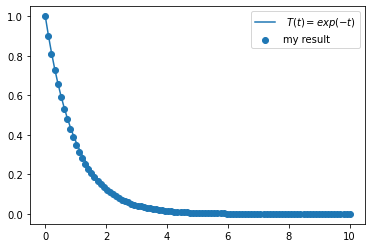

In [2]:
#compare
phi = np.linspace(0,10,100)
T_1 = np.exp(-phi)
T_2 = np.ones(np.shape(phi))
for i,value in enumerate(phi):
    if i == 0:
        T_2[i] == 1
    else:
        T_2[i] = (-T_2[i-1])*0.1 + T_2[i-1]
        
plt.plot(phi,T_1,label=' $T(t)=exp(-t)$')
plt.scatter(phi,T_2,label='my result')
plt.legend()
plt.show()
#q1 finished

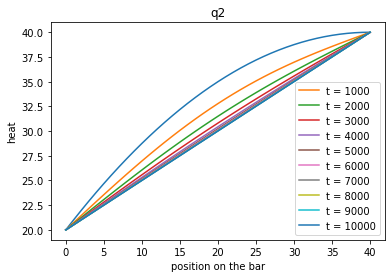

In [1]:
#q2: single thread 
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

sum_1 = int(4/0.1);sum_2 = int(10/0.001 )     
a = 1 * 0.001/(0.1**2)                     
     
mat_heat = np.zeros([sum_1+1,sum_2+1])  ;mat_heat[0,:] = 20;mat_heat[-1,:] = 40

for i in range(sum_1+1):
    mat_heat[i,0] = 1.25*i*0.1*(8-i*0.1)+20
for j in range(sum_2):
    for i in range(1,sum_1):
        mat_heat[i,j+1] = a*mat_heat[i+1,j]+(1-2*a)*mat_heat[i,j]+a*mat_heat[i-1,j]

x2 = np.arange(0, sum_1 + 1, 1)
y2 = mat_heat[:, 0]
plt.plot(x2, y2)

x3 = np.arange(0, sum_1 + 1, 1)
y3 = mat_heat[:, 1000]
plt.plot(x3, y3,label='t = 1000')

x3 = np.arange(0, sum_1 + 1, 1)
y3 = mat_heat[:, 2000]
plt.plot(x3, y3,label='t = 2000')
 
x3 = np.arange(0, sum_1 + 1, 1)
y3 = mat_heat[:, 3000]
plt.plot(x3, y3,label='t = 3000')

x3 = np.arange(0, sum_1 + 1, 1)
y3 = mat_heat[:, 4000]
plt.plot(x3, y3,label='t = 4000')

x3 = np.arange(0, sum_1 + 1, 1)
y3 = mat_heat[:, 5000]
plt.plot(x3, y3,label='t = 5000')

x3 = np.arange(0, sum_1 + 1, 1)
y3 = mat_heat[:, 6000]
plt.plot(x3, y3,label='t = 6000')
  
x3 = np.arange(0, sum_1 + 1, 1)
y3 = mat_heat[:, 7000]
plt.plot(x3, y3,label='t = 7000')
   
x3 = np.arange(0, sum_1 + 1, 1)
y3 = mat_heat[:, 8000]
plt.plot(x3, y3,label='t = 8000')
       
x3 = np.arange(0, sum_1 + 1, 1)
y3 = mat_heat[:, 9000]
plt.plot(x3, y3,label='t = 9000')
       
x3 = np.arange(0, sum_1 + 1, 1)
y3 = mat_heat[:, 9999]
plt.plot(x3, y3,label='t = 10000')
plt.legend()
plt.xlabel('position on the bar')
plt.ylabel('heat')
plt.title('q2')
plt.show()
#q2 finished

In [2]:
#q3
!pip install mpi4py

     |████████████████████████████████| 2.5 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.3-cp37-cp37m-linux_x86_64.whl size=2185342 sha256=1f4f5effb19b0d42c105463c06af820cf9286bb32e2454fd57c4cddcc61c0763
  Stored in directory: /root/.cache/pip/wheels/7a/07/14/6a0c63fa2c6e473c6edc40985b7d89f05c61ff25ee7f0ad9ac
Successfully built mpi4py


In [5]:
%%file Q3.py

import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpi4py import MPI
import time
import math

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

def heatchuandao(m):
    sum_1 = int(30 / 0.1);sum_2 = int(10 / 0.001)
    a = 1 * 0.001 / (0.1 ** 2)
    mat_heat = np.zeros([sum_1+1, sum_2 + 1])
    mat_heat[0, :] = 20;mat_heat[-1, :] = 40

    for i in range(sum_1+1):
        mat_heat[i, 0] = 0.022222222 * i * 0.1 * (60 - i * 0.1) + 20

    for k in range(sum_2):
        for i in range(m, sum_1, 3):

            if i == m:
                mat_heat[i, k + 1] = a * mat_heat[i + 3, k] + (1 - 2 * a) * mat_heat[i, k] + a * mat_heat[0, k]

            elif i == 298 or i == 299:
                mat_heat[i, k + 1] = a * mat_heat[300, k] + (1 - 2 * a) * mat_heat[i, k] + a * mat_heat[i - 3, k]
            else:
                mat_heat[i, k + 1] = a * mat_heat[i + 3, k] + (1 - 2 * a) * mat_heat[i, k] + a * mat_heat[i - 3, k]
    return mat_heat


def q3_1():
    if rank == 0:
        sum_1 = int(30 / 0.1);sum_2 = int(10 / 0.001)
        a = 1 * 0.001 / (0.1 ** 2)
        mat_heat = np.zeros([sum_1 + 1, sum_2 + 1])

        mat_heat[0, :] = 20;mat_heat[-1, :] = 40

        for i in range(sum_1 + 1):
            mat_heat[i, 0] = 0.022222222 * i * 0.1 * (60 - i * 0.1) + 20

        for item in range(1, size):
            part = comm.recv(source=item, tag=0)

            for k in range(sum_2):
                for i in range(item, sum_1, 3):
                    mat_heat[i, k] = part[i, k]     

        x2 = np.arange(0, sum_1 + 1, 1)
        y2 = mat_heat[:, 0]
        plt.plot(x2, y2)

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 1000]
        plt.plot(x3, y3,label='t = 1000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 2000]
        plt.plot(x3, y3,label='t = 2000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 3000]
        plt.plot(x3, y3,label='t = 3000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 4000]
        plt.plot(x3, y3,label='t = 4000')
  
        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 5000]
        plt.plot(x3, y3,label='t = 5000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 6000]
        plt.plot(x3, y3,label='t = 6000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 7000]
        plt.plot(x3, y3,label='t = 7000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 8000]
        plt.plot(x3, y3,label='t = 8000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 9000]
        plt.plot(x3, y3,label='t = 9000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 9999]
        plt.plot(x3, y3,label='t = 10000')
        plt.legend()
        plt.xlabel('position on the bar')
        plt.ylabel('heat')
        plt.title('q3')
        plt.savefig('result3.png')
        plt.show()

    else:
        part = heatchuandao(rank)
        comm.send(part, dest=0, tag=0)


if __name__ == '__main__':
    t = time.time()
    q3_1()
    # plt.show()


Overwriting Q3.py


<Figure size 640x480 with 1 Axes>


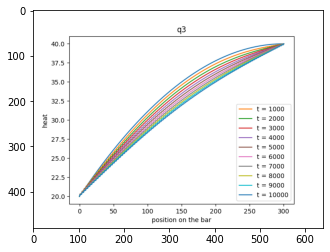

In [6]:
!mpiexec --allow-run-as-root -np 4 python Q3.py 
import matplotlib.image as mpimg
img3 = mpimg.imread('/content/result3.png')
plt.imshow(img3)
plt.show()
#since the colab can not directly show the figure, we have to use this way to save and read it,

In [9]:
#q4
%%file Q4.py

import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpi4py import MPI
import time
import math

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()


def heatchuandao(m):
    sum_1 = int(30 / 0.1);sum_2 = int(10 / 0.001)
    l = 1 * 0.001 / (0.1 ** 2)
    mat_heat = np.zeros([sum_1+1, sum_2 + 1])
    mat_heat[0, :] = 20;mat_heat[-1, :] = 40

    for i in range(sum_1+1):
        mat_heat[i, 0] = 0.022222222 * i * 0.1 * (60 - i * 0.1) + 20

    for k in range(sum_2):
        for i in range(m, sum_1, 3):
            a = l * (0.5 + (i//10)*0.04)
            if i == m:
                mat_heat[i, k + 1] = a * mat_heat[i + 3, k] + (1 - 2 * a) * mat_heat[i, k] + a * mat_heat[0, k]
            elif i == 298 or i == 299:
                mat_heat[i, k + 1] = a * mat_heat[300, k] + (1 - 2 * a) * mat_heat[i, k] + a * mat_heat[i - 3, k]
            else:
                mat_heat[i, k + 1] = a * mat_heat[i + 3, k] + (1 - 2 * a) * mat_heat[i, k] + a * mat_heat[i - 3, k]
    return mat_heat


def q4_1():
    if rank == 0:
        sum_1 = int(30 / 0.1);sum_2 = int(10 / 0.001)
        a = 1 * 0.001 / (0.1 ** 2)
        mat_heat = np.zeros([sum_1 + 1, sum_2 + 1])
        mat_heat[0, :] = 20;mat_heat[-1, :] = 40

        for i in range(sum_1 + 1):
            mat_heat[i, 0] = 0.022222222 * i * 0.1 * (60 - i * 0.1) + 20

        for item in range(1, size):
            part = comm.recv(source=item, tag=0)
            for k in range(sum_2):
                for i in range(item, sum_1, 3):
                    mat_heat[i, k] = part[i, k]

        x2 = np.arange(0, sum_1 + 1, 1)
        y2 = mat_heat[:, 0]
        plt.plot(x2, y2)

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 1000]
        plt.plot(x3, y3,label='t = 1000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 2000]
        plt.plot(x3, y3,label='t = 2000')
 
        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 3000]
        plt.plot(x3, y3,label='t = 3000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 4000]
        plt.plot(x3, y3,label='t = 4000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 5000]
        plt.plot(x3, y3,label='t = 5000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 6000]
        plt.plot(x3, y3,label='t = 6000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 7000]
        plt.plot(x3, y3,label='t = 7000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 8000]
        plt.plot(x3, y3,label='t = 8000')

        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 9000]
        plt.plot(x3, y3,label='t = 9000')
 
        x3 = np.arange(0, sum_1 + 1, 1)
        y3 = mat_heat[:, 9999]
        plt.plot(x3, y3,label='t = 10000')
        plt.legend()
        plt.xlabel('position on the bar')
        plt.ylabel('heat')
        plt.title('q4')
        plt.savefig('result4.png')
        plt.show() 

    else:
        part = heatchuandao(rank)
        comm.send(part, dest=0, tag=0)


if __name__ == '__main__':
    t = time.time()
    q4_1()



Overwriting Q4.py


<Figure size 640x480 with 1 Axes>


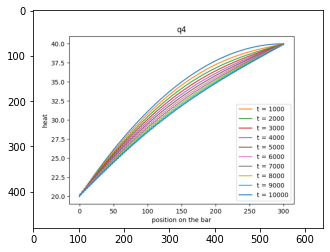

In [10]:
!mpiexec --allow-run-as-root -np 4 python Q4.py 
img4 = mpimg.imread('/content/result4.png')
plt.imshow(img4)
plt.show()
#since the colab can not directly show the figure, we have to use this way to save and read it,

#your result(copy here) 



******